<a href="https://colab.research.google.com/github/TiruveedulaAjay/Trade-Analysis-Market-Segmentation/blob/main/Analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# File paths
export_file = "/content/2010_2021_HS2_export1.csv"
import_file = "/content/2010_2021_HS2_import1.csv"

# Load datasets
exports = pd.read_csv(export_file)
imports = pd.read_csv(import_file)


In [5]:
# Data Cleaning
# Check for missing values
exports.isnull().sum(), imports.isnull().sum()

# Drop missing values
exports.dropna(inplace=True)
imports.dropna(inplace=True)


<ipython-input-6-7821796b7206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="value", y="country", data=top_export_countries, palette="Blues_r")


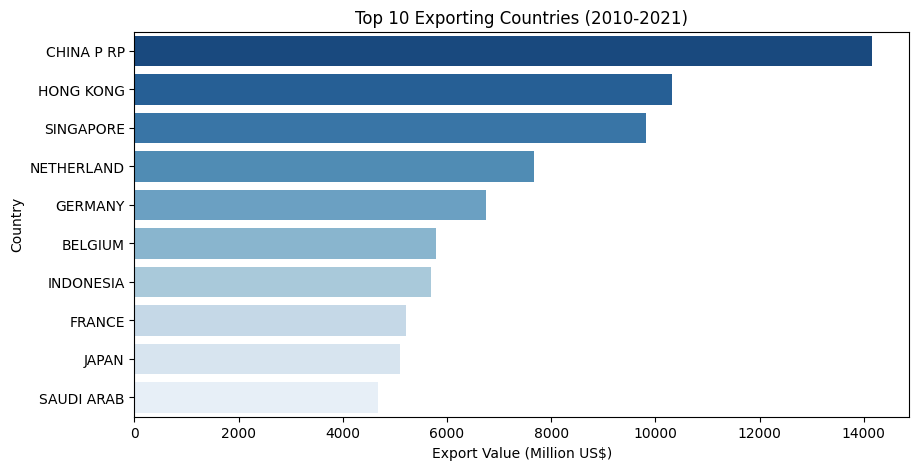

In [6]:
# Geographic Segmentation Analysis
# Top 10 Exporting Countries

top_export_countries = exports.groupby("country")["value"].sum().reset_index()
top_export_countries = top_export_countries.sort_values(by="value", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="value", y="country", data=top_export_countries, palette="Blues_r")
plt.xlabel("Export Value (Million US$)")
plt.ylabel("Country")
plt.title("Top 10 Exporting Countries (2010-2021)")
plt.show()


<ipython-input-7-903ae2f7b22c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="value", y="country", data=top_import_countries, palette="Reds_r")


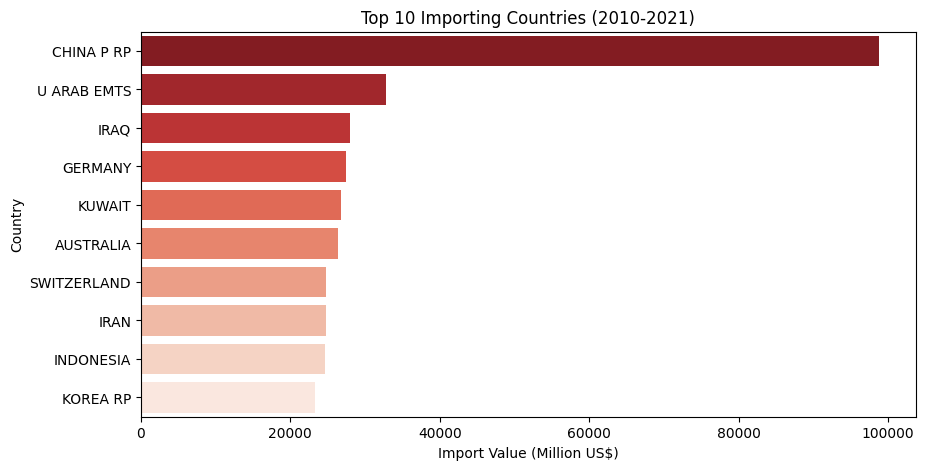

In [7]:
# Top 10 Importing Countries

top_import_countries = imports.groupby("country")["value"].sum().reset_index()
top_import_countries = top_import_countries.sort_values(by="value", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="value", y="country", data=top_import_countries, palette="Reds_r")
plt.xlabel("Import Value (Million US$)")
plt.ylabel("Country")
plt.title("Top 10 Importing Countries (2010-2021)")
plt.show()


<ipython-input-8-46d2a62e7778>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="value", y="Commodity", data=top_export_commodities, palette="Greens_r")


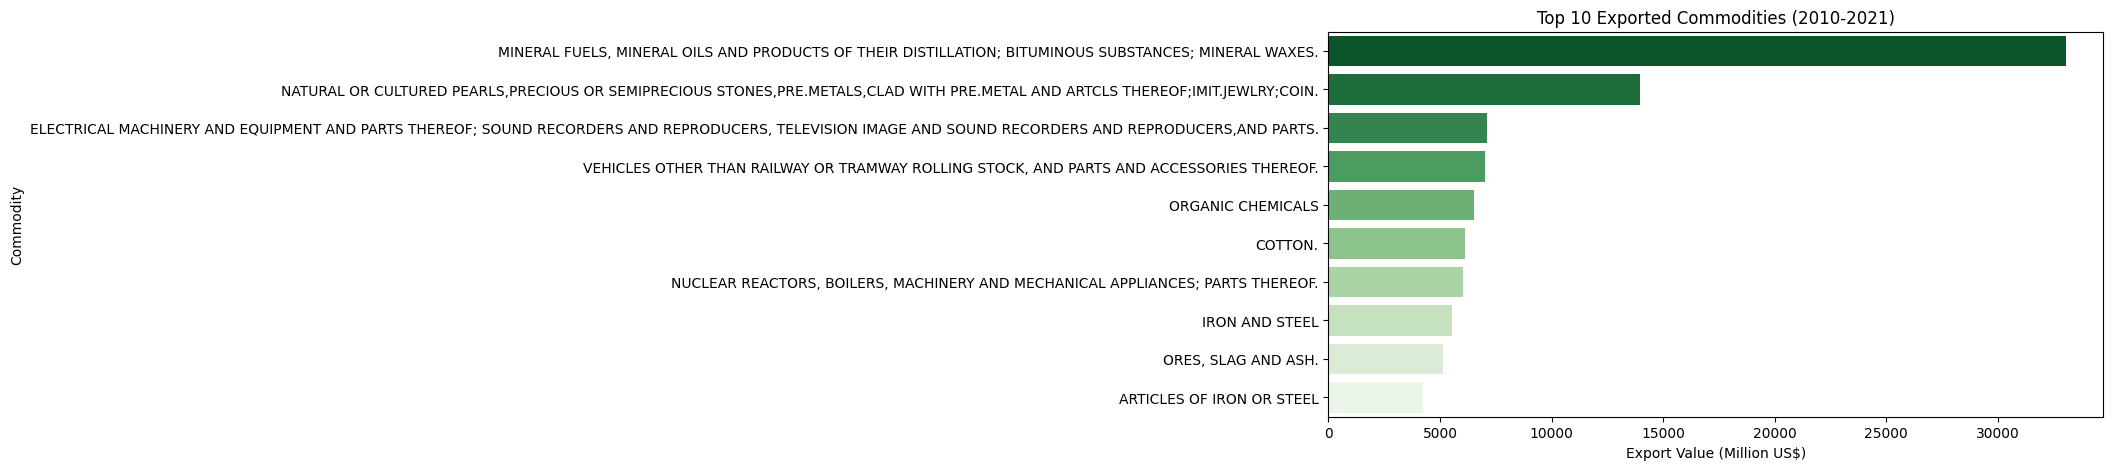

In [8]:
# Commodity Segmentation Analysis
# Top 10 Exported Commodities

top_export_commodities = exports.groupby("Commodity")["value"].sum().reset_index()
top_export_commodities = top_export_commodities.sort_values(by="value", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="value", y="Commodity", data=top_export_commodities, palette="Greens_r")
plt.xlabel("Export Value (Million US$)")
plt.ylabel("Commodity")
plt.title("Top 10 Exported Commodities (2010-2021)")
plt.show()


<ipython-input-9-ec820582be2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="value", y="Commodity", data=top_import_commodities, palette="Purples_r")


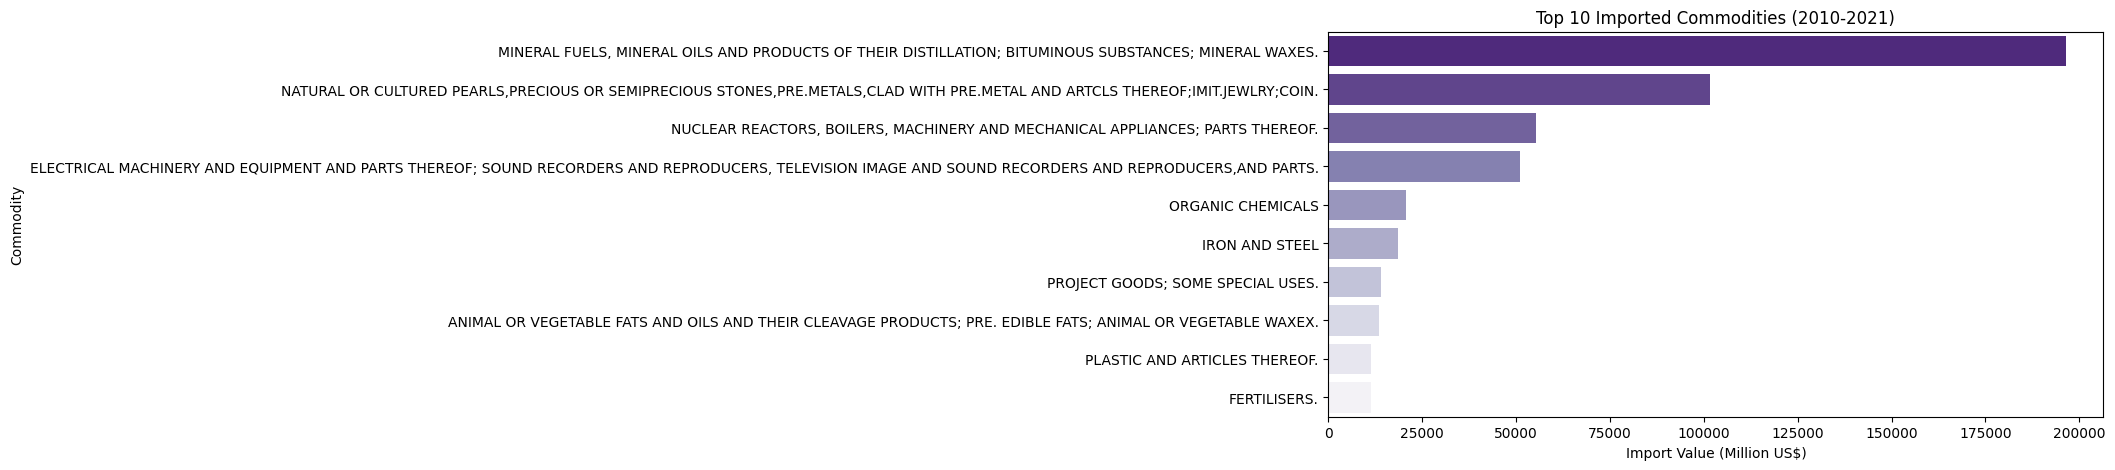

In [9]:
# Top 10 Imported Commodities

top_import_commodities = imports.groupby("Commodity")["value"].sum().reset_index()
top_import_commodities = top_import_commodities.sort_values(by="value", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="value", y="Commodity", data=top_import_commodities, palette="Purples_r")
plt.xlabel("Import Value (Million US$)")
plt.ylabel("Commodity")
plt.title("Top 10 Imported Commodities (2010-2021)")
plt.show()


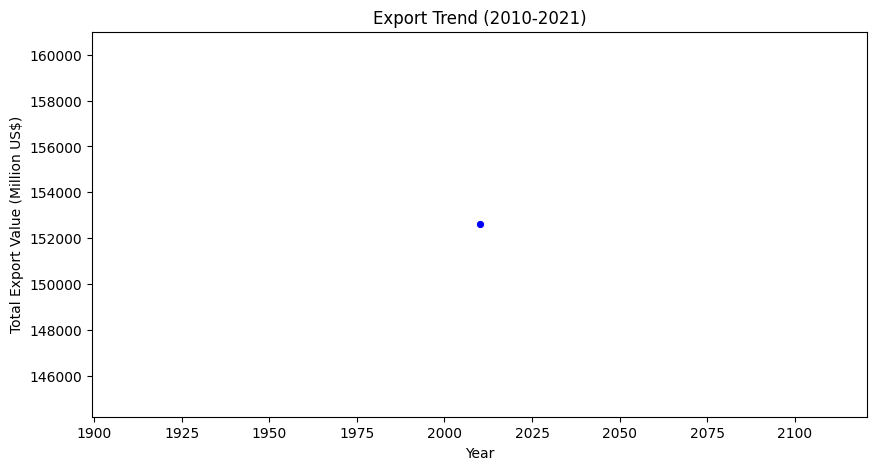

In [10]:
# Trade Trend Analysis (2010-2021)

# Export Trend Over Time

export_trend = exports.groupby("year")["value"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="value", data=export_trend, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Total Export Value (Million US$)")
plt.title("Export Trend (2010-2021)")
plt.show()


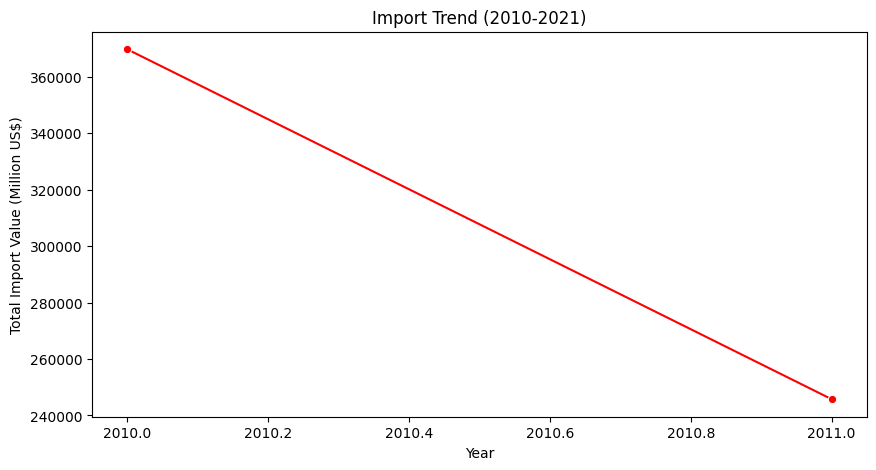

In [11]:
# Import Trend Over Time

import_trend = imports.groupby("year")["value"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="value", data=import_trend, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Total Import Value (Million US$)")
plt.title("Import Trend (2010-2021)")
plt.show()


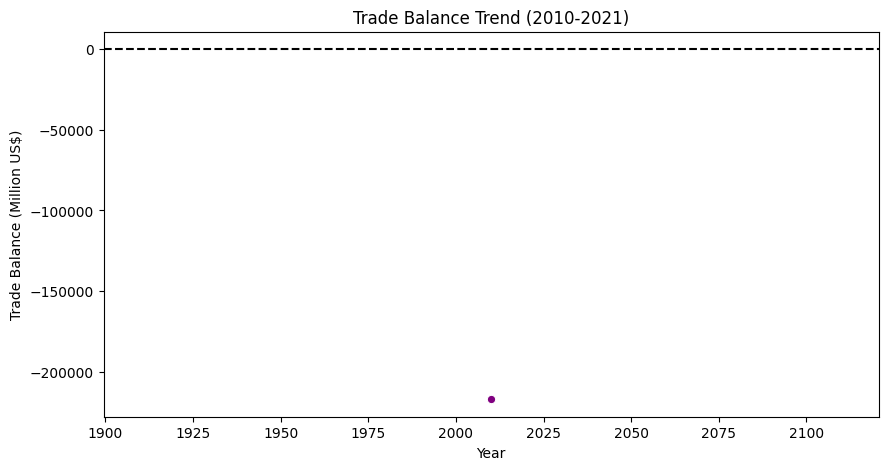

In [12]:
# Trade Balance Calculation

trade_balance = export_trend.copy()
trade_balance["import_value"] = import_trend["value"]
trade_balance["trade_balance"] = trade_balance["value"] - trade_balance["import_value"]

plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="trade_balance", data=trade_balance, marker="o", color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Trade Balance (Million US$)")
plt.title("Trade Balance Trend (2010-2021)")
plt.show()
